In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

In [ ]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
# Load stocks data for Microsoft and Apple
stocks_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/stock_data.csv', index_col='Date', parse_dates=True) # Significant to have index as date
stocks_df = stocks_df[(stocks_df['company_name'] == 'MICROSOFT') | (stocks_df['company_name'] == 'APPLE')]

# Keep only the columns we need (company_name, Adj Close)
stocks_df = stocks_df[['company_name', 'Adj Close']]
stocks_df

,company_name,Adj Close
Date,,
2019-02-19,APPLE,41.138523
2019-02-20,APPLE,41.403271
2019-02-21,APPLE,41.169807
2019-02-22,APPLE,41.629509
2019-02-25,APPLE,41.932755
...,...,...
2024-02-12,MICROSOFT,414.493500
2024-02-13,MICROSOFT,405.570007
2024-02-14,MICROSOFT,409.489990


In [ ]:
# Separate dataframe for Microsoft stocks
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']
microsoft_df = microsoft_df.drop(columns=['company_name']) # Drop the company_name column
microsoft_df.head()

,Adj Close
Date,
2019-02-19,102.528320
2019-02-20,101.995255
2019-02-21,104.146538
2019-02-22,105.631493
2019-02-25,106.221664


In [ ]:
# Separate dataframe for Apple stocks
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']
apple_df = apple_df.drop(columns=['company_name']) # Drop the company_name column
apple_df.head()

,Adj Close
Date,
2019-02-19,41.138523
2019-02-20,41.403271
2019-02-21,41.169807
2019-02-22,41.629509
2019-02-25,41.932755


In [ ]:
# Load temperature data
temperature_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2025/course-datasets/main/cities_temperature.csv')
temperature_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Sydney,1,1,1995,59.1
1,Australia/South Pacific,Australia,NaN,Sydney,1,2,1995,64.6
2,Australia/South Pacific,Australia,NaN,Sydney,1,3,1995,79.1
3,Australia/South Pacific,Australia,NaN,Sydney,1,4,1995,77.3
4,Australia/South Pacific,Australia,NaN,Sydney,1,5,1995,70.2


In [ ]:
# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9266,North America,Canada,NaN,Calgary,1,1,1995,12.6
9267,North America,Canada,NaN,Calgary,1,2,1995,4.5
9268,North America,Canada,NaN,Calgary,1,3,1995,2.5
9269,North America,Canada,NaN,Calgary,1,4,1995,11.4
9270,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [ ]:
# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex

city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,North America,Canada,NaN,Calgary,1,1,1995,12.6
1995-01-02,North America,Canada,NaN,Calgary,1,2,1995,4.5
1995-01-03,North America,Canada,NaN,Calgary,1,3,1995,2.5
1995-01-04,North America,Canada,NaN,Calgary,1,4,1995,11.4
1995-01-05,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [ ]:
# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

city_1_df.head()

,AvgTemperature
Date,
1995-01-01,12.6
1995-01-02,4.5
1995-01-03,2.5
1995-01-04,11.4
1995-01-05,11.3


# Q1

## (a)

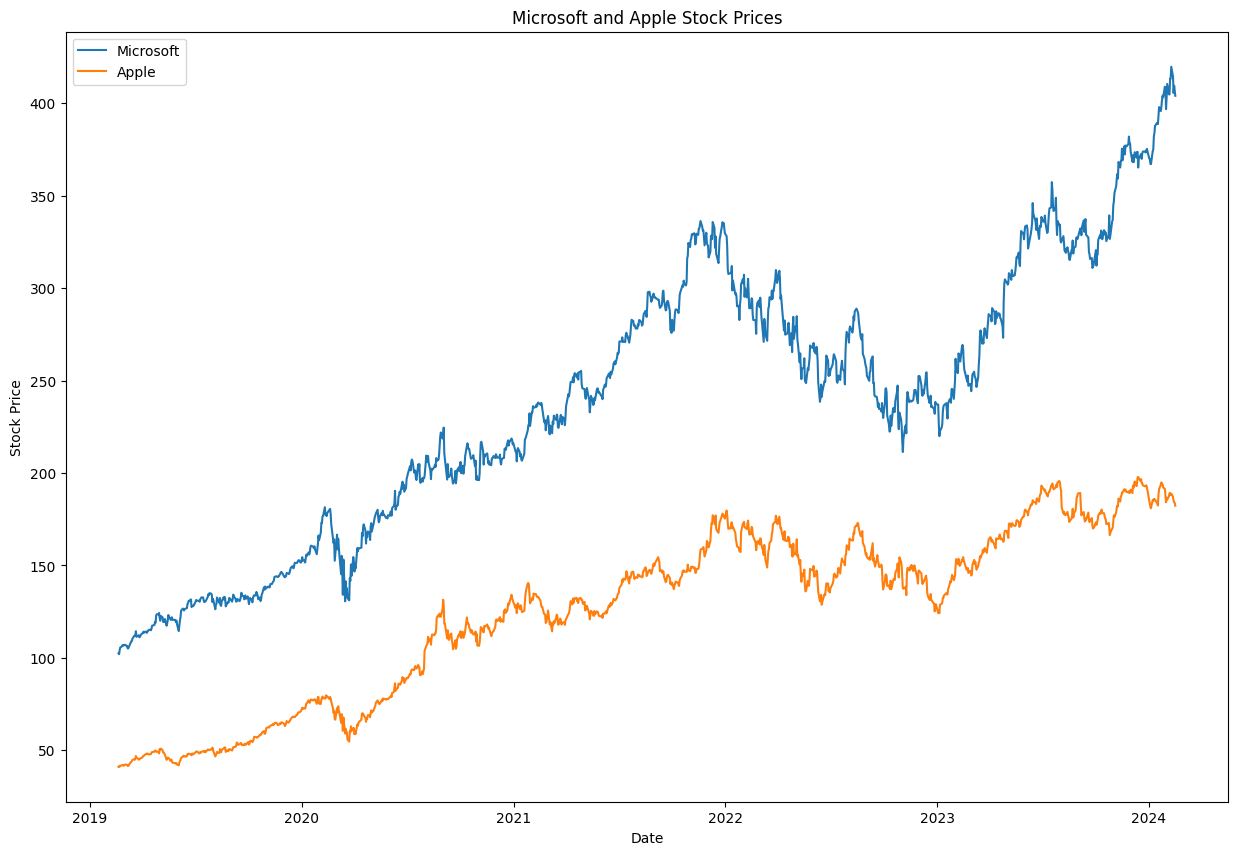

In [ ]:
# Plot the time series of Microsoft and Apple stock prices on the same plot

## YOUR CODE STARTS HERE
plt.figure(figsize=(15, 10))
plt.plot(microsoft_df.index, microsoft_df['Adj Close'], label='Microsoft')
plt.plot(apple_df.index, apple_df['Adj Close'], label='Apple')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft and Apple Stock Prices')
plt.legend()
plt.show()

**Enter answer here:** Both Microsoft and Apple show a general increase/upward trend in their stock prices. However, after 2023 Microsoft's stock prices increased at a much higher rate while Apple's stayed more stagnant.

## (b)

In [ ]:
# Downsample Microsoft stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE
M_stocks_weekly = microsoft_df.resample('W').mean()
M_stocks_monthly = microsoft_df.resample('ME').mean()
M_stocks_quarterly = microsoft_df.resample('QE').mean()
M_stocks_semiannually = microsoft_df.resample('6M').mean()
M_stocks_annually = microsoft_df.resample('YE').mean()

print(M_stocks_weekly.head())
print(M_stocks_monthly.head())
print(M_stocks_quarterly.head())
print(M_stocks_semiannually.head())
print(M_stocks_annually.head())


             Adj Close
Date                  
2019-02-24  103.575401
2019-03-03  106.741396
2019-03-10  105.966560
2019-03-17  108.791780
2019-03-24  112.325195
             Adj Close
Date                  
2019-02-28  105.111517
2019-03-31  109.594991
2019-04-30  116.887392
2019-05-31  120.511057
2019-06-30  126.109168
             Adj Close
Date                  
2019-03-31  108.358171
2019-06-30  121.080347
2019-09-30  131.607784
2019-12-31  141.042020
2020-03-31  158.377493
             Adj Close
Date                  
2019-02-28  105.111517
2019-08-31  122.691497
2020-02-29  147.234173
2020-08-31  180.048692
2021-02-28  212.580334
             Adj Close
Date                  
2019-12-31  128.272892
2020-12-31  186.712883
2021-12-31  269.500621
2022-12-31  264.701494
2023-12-31  312.156067


<ipython-input-44-52ab1b0968ea>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  M_stocks_semiannually = microsoft_df.resample('6M').mean()


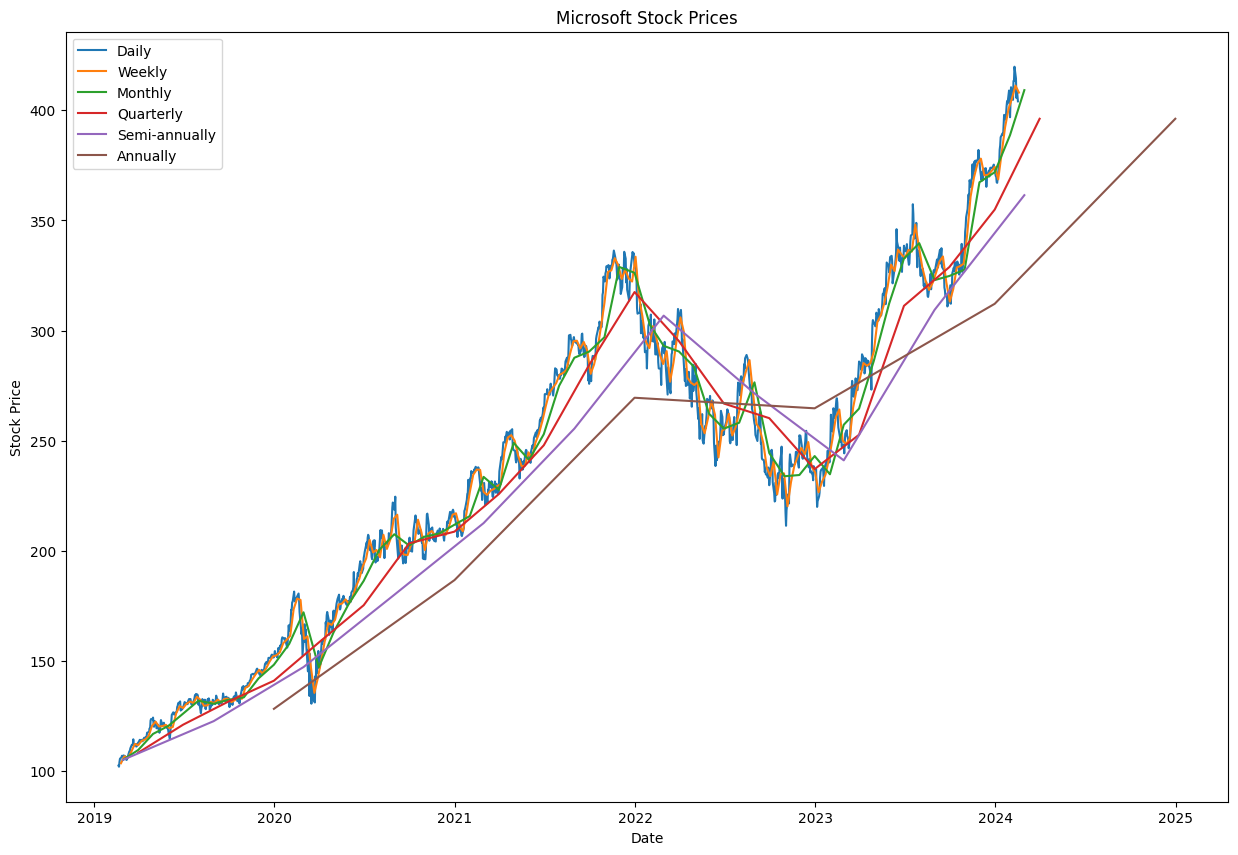

In [ ]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Microsoft on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE
plt.figure(figsize=(15,10))
plt.plot(microsoft_df.index, microsoft_df['Adj Close'], label='Daily')
plt.plot(M_stocks_weekly.index, M_stocks_weekly['Adj Close'], label='Weekly')
plt.plot(M_stocks_monthly.index, M_stocks_monthly['Adj Close'], label='Monthly')
plt.plot(M_stocks_quarterly.index, M_stocks_quarterly['Adj Close'], label='Quarterly')
plt.plot(M_stocks_semiannually.index, M_stocks_semiannually['Adj Close'], label='Semi-annually')
plt.plot(M_stocks_annually.index, M_stocks_annually['Adj Close'], label='Annually')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Prices')
plt.legend()
plt.show()

In [ ]:
# Downsample Apple stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE
A_stocks_weekly = apple_df.resample('W').mean()
A_stocks_monthly = apple_df.resample('ME').mean()
A_stocks_quarterly = apple_df.resample('QE').mean()
A_stocks_semiannually = apple_df.resample('6M').mean()
A_stocks_annually = apple_df.resample('YE').mean()

print(A_stocks_weekly.head())
print(A_stocks_monthly.head())
print(A_stocks_quarterly.head())
print(A_stocks_semiannually.head())
print(A_stocks_annually.head())

            Adj Close
Date                 
2019-02-24  41.335278
2019-03-03  41.952009
2019-03-10  41.940459
2019-03-17  43.868744
2019-03-24  45.672845
            Adj Close
Date                 
2019-02-28  41.623787
2019-03-31  44.114187
2019-04-30  48.259177
2019-05-31  46.151073
2019-06-30  46.621609
            Adj Close
Date                 
2019-03-31  43.427180
2019-06-30  47.003151
2019-09-30  50.633826
2019-12-31  62.521347
2020-03-31  71.651587
             Adj Close
Date                  
2019-02-28   41.623787
2019-08-31   47.428129
2020-02-29   65.268842
2020-08-31   83.170488
2021-02-28  120.767233
             Adj Close
Date                  
2019-12-31   52.102354
2020-12-31   93.275343
2021-12-31  138.846599
2022-12-31  153.328144
2023-12-31  171.901758


<ipython-input-46-487124bc2f87>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  A_stocks_semiannually = apple_df.resample('6M').mean()


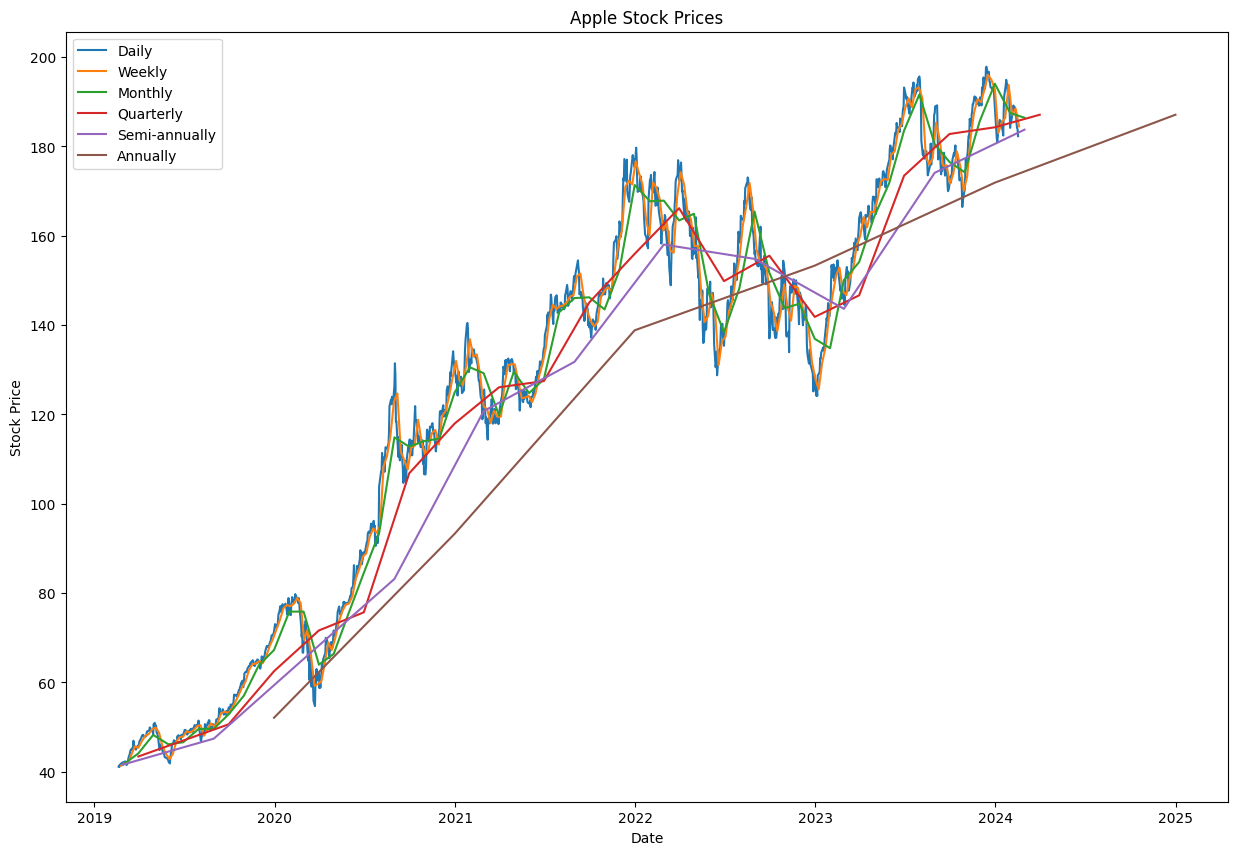

In [ ]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Apple on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE
plt.figure(figsize=(15,10))
plt.plot(apple_df.index, apple_df['Adj Close'], label='Daily')
plt.plot(A_stocks_weekly.index, A_stocks_weekly['Adj Close'], label='Weekly')
plt.plot(A_stocks_monthly.index, A_stocks_monthly['Adj Close'], label='Monthly')
plt.plot(A_stocks_quarterly.index, A_stocks_quarterly['Adj Close'], label='Quarterly')
plt.plot(A_stocks_semiannually.index, A_stocks_semiannually['Adj Close'], label='Semi-annually')
plt.plot(A_stocks_annually.index, A_stocks_annually['Adj Close'], label='Annually')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Prices')
plt.legend()
plt.show()


# Q2

In [ ]:
# Add a column to the monthly downsampled Microsoft dataframe (from Q1) called 'monthly_return'
# This column will contain the monthly return of the stock (use the pct_change() method)
# Then display the first 5 rows of the dataframe

## YOUR CODE STARTS HERE
M_stocks_monthly['monthly_return'] = M_stocks_monthly['Adj Close'].pct_change()
M_stocks_monthly.head()

,Adj Close,monthly_return
Date,,
2019-02-28,105.111517,NaN
2019-03-31,109.594991,0.042654
2019-04-30,116.887392,0.066540
2019-05-31,120.511057,0.031001
2019-06-30,126.109168,0.046453


In [ ]:
# Do the same for the monthly downsampled Apple dataframe

## YOUR CODE STARTS HERE
A_stocks_monthly['monthly_return'] = A_stocks_monthly['Adj Close'].pct_change()
A_stocks_monthly.head()

,Adj Close,monthly_return
Date,,
2019-02-28,41.623787,NaN
2019-03-31,44.114187,0.059831
2019-04-30,48.259177,0.093960
2019-05-31,46.151073,-0.043683
2019-06-30,46.621609,0.010196


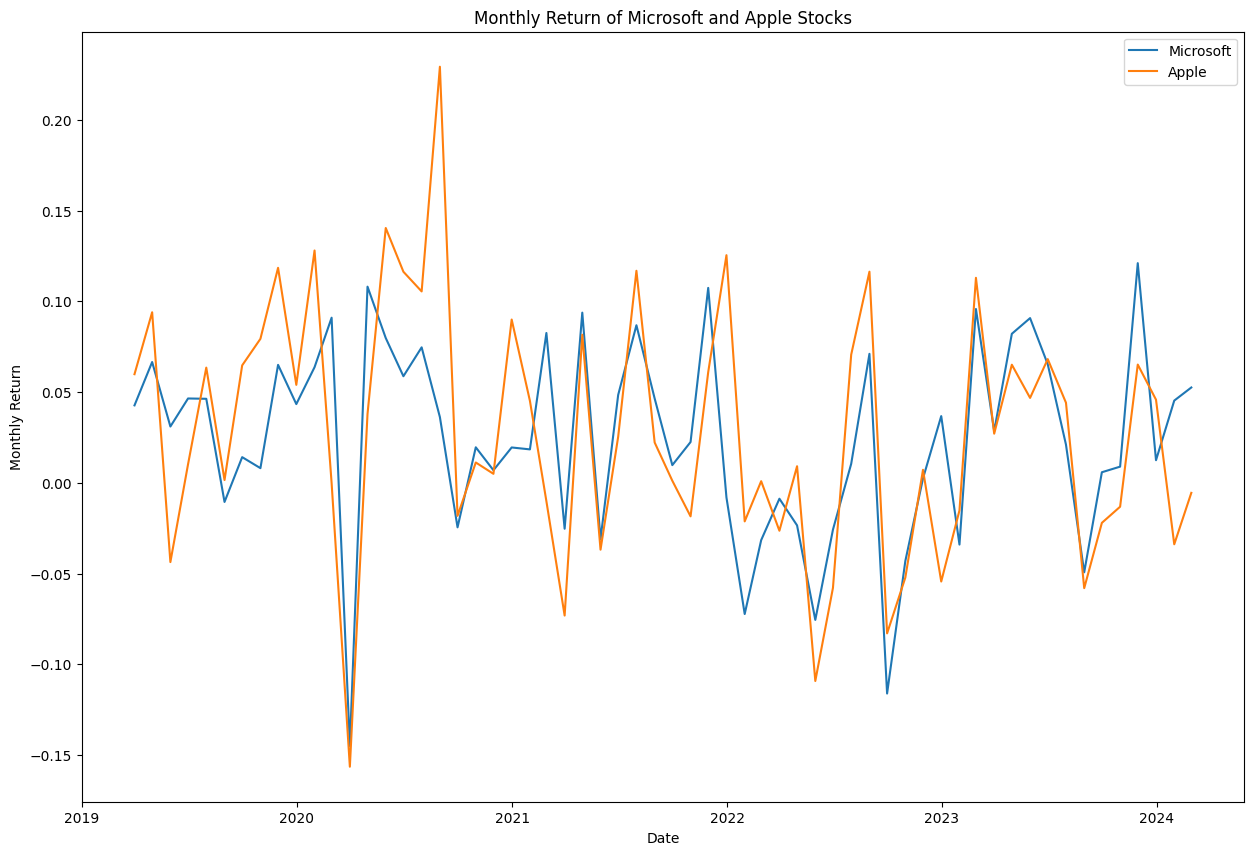

In [ ]:
# Plot the monthly return of Microsoft and Apple stocks on the same plot

## YOUR CODE STARTS HERE
plt.figure(figsize=(15, 10))
plt.plot(M_stocks_monthly.index, M_stocks_monthly['monthly_return'], label='Microsoft')
plt.plot(A_stocks_monthly.index, A_stocks_monthly['monthly_return'], label='Apple')

plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.title('Monthly Return of Microsoft and Apple Stocks')
plt.legend()
plt.show()

**Enter answer here:**
Both Apple and Microsoft had periods of significant gains and losses for their monthly returns. The plot shows the instability of both stocks which is not super apparent from the plot in Q1(a).

# Q3

In [ ]:
# Smooth the monthly stock prices of Microsoft using exponential smoothing with alpha = 0.2, 0.4, 0.6, 0.8

## YOUR CODE STARTS HERE
M_stocks_monthly_smoothed_02 = M_stocks_monthly['Adj Close'].ewm(alpha=0.2, adjust=False).mean()
M_stocks_monthly_smoothed_04 = M_stocks_monthly['Adj Close'].ewm(alpha=0.4, adjust=False).mean()
M_stocks_monthly_smoothed_06 = M_stocks_monthly['Adj Close'].ewm(alpha=0.6, adjust=False).mean()
M_stocks_monthly_smoothed_08 = M_stocks_monthly['Adj Close'].ewm(alpha=0.8, adjust=False).mean()

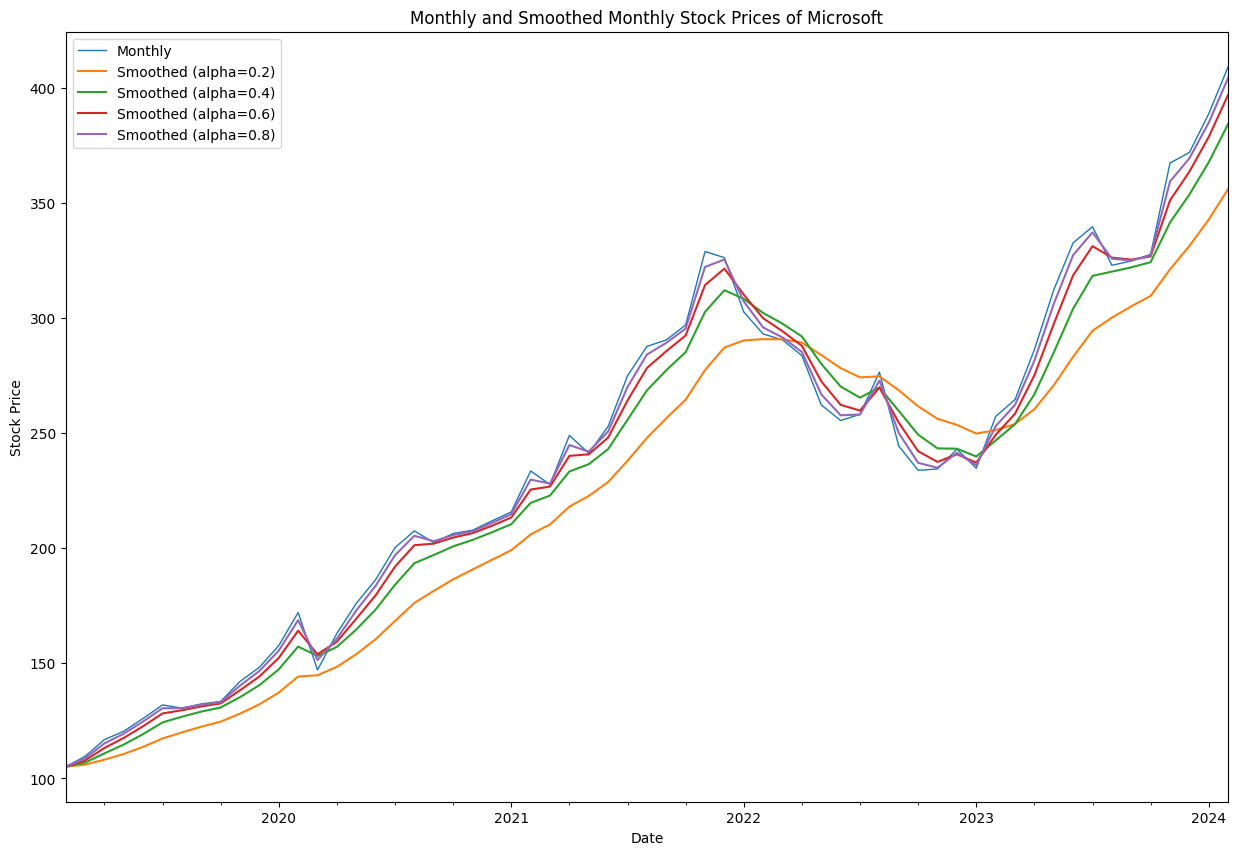

In [ ]:
# Plot the monthly and smoothed monthly stock prices of Microsoft on the same plot (5 lines)

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(figsize=(15, 10))
M_stocks_monthly.plot(ax=ax, y='Adj Close', label='Monthly', title=f"Monthly and Smoothed Monthly Stock Prices of Microsoft", xlabel="Date", ylabel="Adj Close", linewidth=1)
M_stocks_monthly_smoothed_02.plot(ax=ax, y='Adj Close', label='Smoothed (alpha=0.2)', xlabel="Date", ylabel="Adj Close" )
M_stocks_monthly_smoothed_04.plot(ax=ax, y='Adj Close', label='Smoothed (alpha=0.4)', xlabel="Date", ylabel="Adj Close" )
M_stocks_monthly_smoothed_06.plot(ax=ax, y='Adj Close', label='Smoothed (alpha=0.6)', xlabel="Date", ylabel="Adj Close" )
M_stocks_monthly_smoothed_08.plot(ax=ax, y='Adj Close', label='Smoothed (alpha=0.8)', xlabel="Date", ylabel="Adj Close" )

ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Monthly and Smoothed Monthly Stock Prices of Microsoft')
ax.legend()
plt.show()

In [ ]:
# Smooth the monthly stock prices of Apple using exponential smoothing with alpha = 0.2, 0.4, 0.6, 0.8

## YOUR CODE STARTS HERE
A_stocks_monthly_smoothed_02 = A_stocks_monthly['Adj Close'].ewm(alpha=0.2, adjust=False).mean()
A_stocks_monthly_smoothed_04 = A_stocks_monthly['Adj Close'].ewm(alpha=0.4, adjust=False).mean()
A_stocks_monthly_smoothed_06 = A_stocks_monthly['Adj Close'].ewm(alpha=0.6, adjust=False).mean()
A_stocks_monthly_smoothed_08 = A_stocks_monthly['Adj Close'].ewm(alpha=0.8, adjust=False).mean()

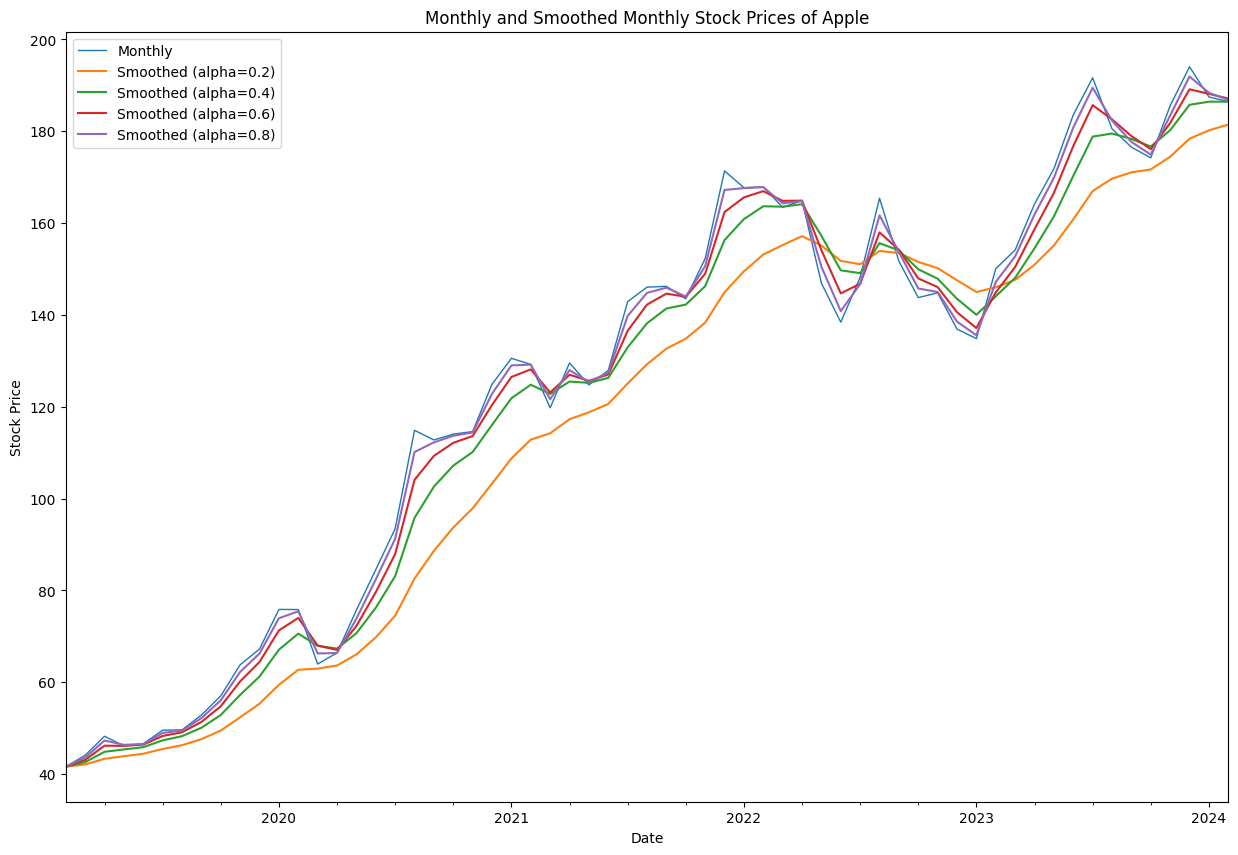

In [ ]:
from re import A
# Plot the monthly and smoothed monthly stock prices of Apple on the same plot (5 lines)

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(figsize=(15, 10))
A_stocks_monthly.plot(ax=ax, y='Adj Close', label='Monthly', title=f"Monthly and Smoothed Monthly Stock Prices of Apple", xlabel="Date", ylabel="Adj Close", linewidth=1)
A_stocks_monthly_smoothed_02.plot(ax=ax, y='Adj Close', label='Smoothed (alpha=0.2)', xlabel="Date", ylabel="Adj Close" )
A_stocks_monthly_smoothed_04.plot(ax=ax, y='Adj Close', label='Smoothed (alpha=0.4)', xlabel="Date", ylabel="Adj Close" )
A_stocks_monthly_smoothed_06.plot(ax=ax, y='Adj Close', label='Smoothed (alpha=0.6)', xlabel="Date", ylabel="Adj Close" )
A_stocks_monthly_smoothed_08.plot(ax=ax, y='Adj Close', label='Smoothed (alpha=0.8)', xlabel="Date", ylabel="Adj Close" )

ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Monthly and Smoothed Monthly Stock Prices of Apple')
ax.legend()
plt.show()


**Enter answer here:**

# Q4

## (a)

<Axes: title={'center': 'Edmonton Temperature'}, xlabel='Date', ylabel='Temperature'>

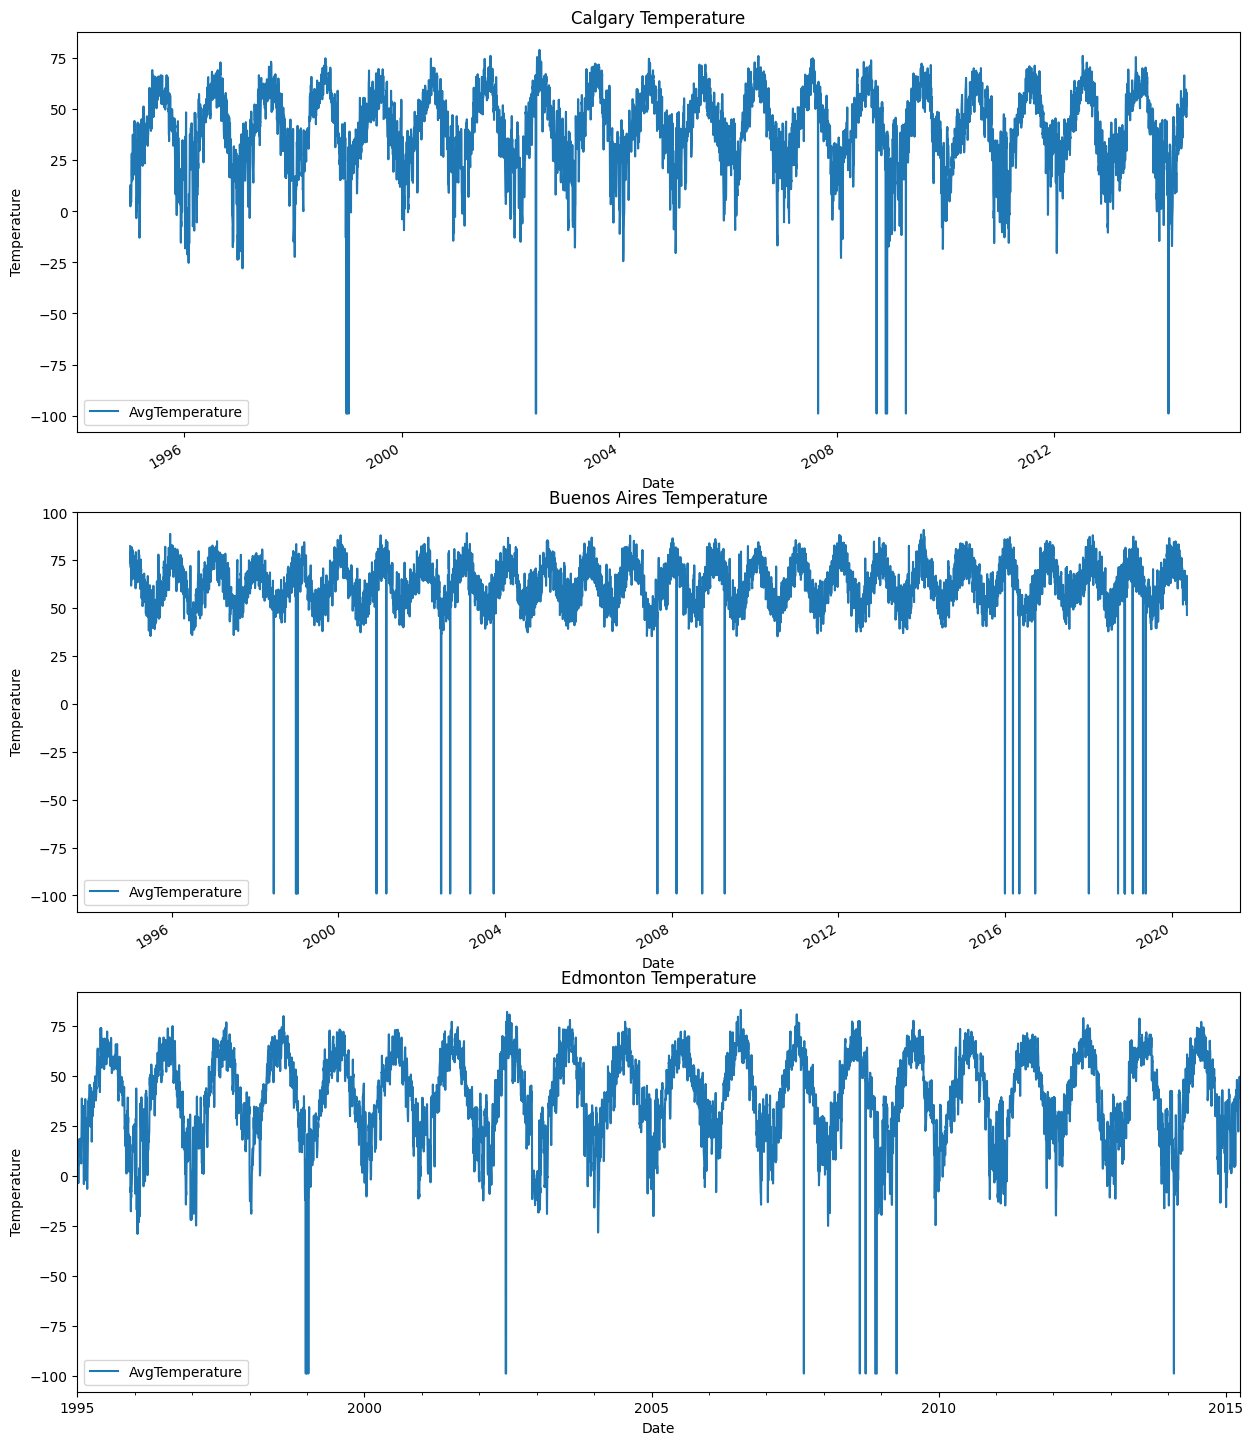

In [ ]:
# Plot temperature data for each city in different subplots
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_df.plot(ax=ax[0], title=f"{city_1} Temperature", xlabel="Date", ylabel="Temperature")
city_2_df.plot(ax=ax[1], title=f"{city_2} Temperature", xlabel="Date", ylabel="Temperature")
city_3_df.plot(ax=ax[2], title=f"{city_3} Temperature", xlabel="Date", ylabel="Temperature")
## YOUR CODE STARTS HERE


**Enter answer here:** The datasets for the three cities dont perfectly overlap (their data ranges are different) so the time series are misaligned. There is such high variability in the data because it is daily data rather than a lower frequency time-scale such as a monthly time-scale.

## (b)

In [ ]:
# Remove entries that aren't in intersection of all three indices (which are dates)

## YOUR CODE STARTS HERE
index_intersection = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df = city_1_df.loc[index_intersection]
city_2_df = city_2_df.loc[index_intersection]
city_3_df = city_3_df.loc[index_intersection]

In [ ]:
# Downsample the data to monthly

## YOUR CODE STARTS HERE
city_1_monthly = city_1_df.resample('ME').mean()
city_2_monthly = city_2_df.resample('ME').mean()
city_3_monthly = city_3_df.resample('ME').mean()

In [ ]:
# Apply exponential smoothing to temperature data with alpha = 0.3

## YOUR CODE STARTS HERE
city_1_monthly = city_1_monthly.ewm(alpha=0.3, adjust=False).mean()
city_2_monthly = city_2_monthly.ewm(alpha=0.3, adjust=False).mean()
city_3_monthly = city_3_monthly.ewm(alpha=0.3, adjust=False).mean()

<Axes: title={'center': 'Edmonton Monthly Temperature'}, xlabel='Date', ylabel='AvgTemperature'>

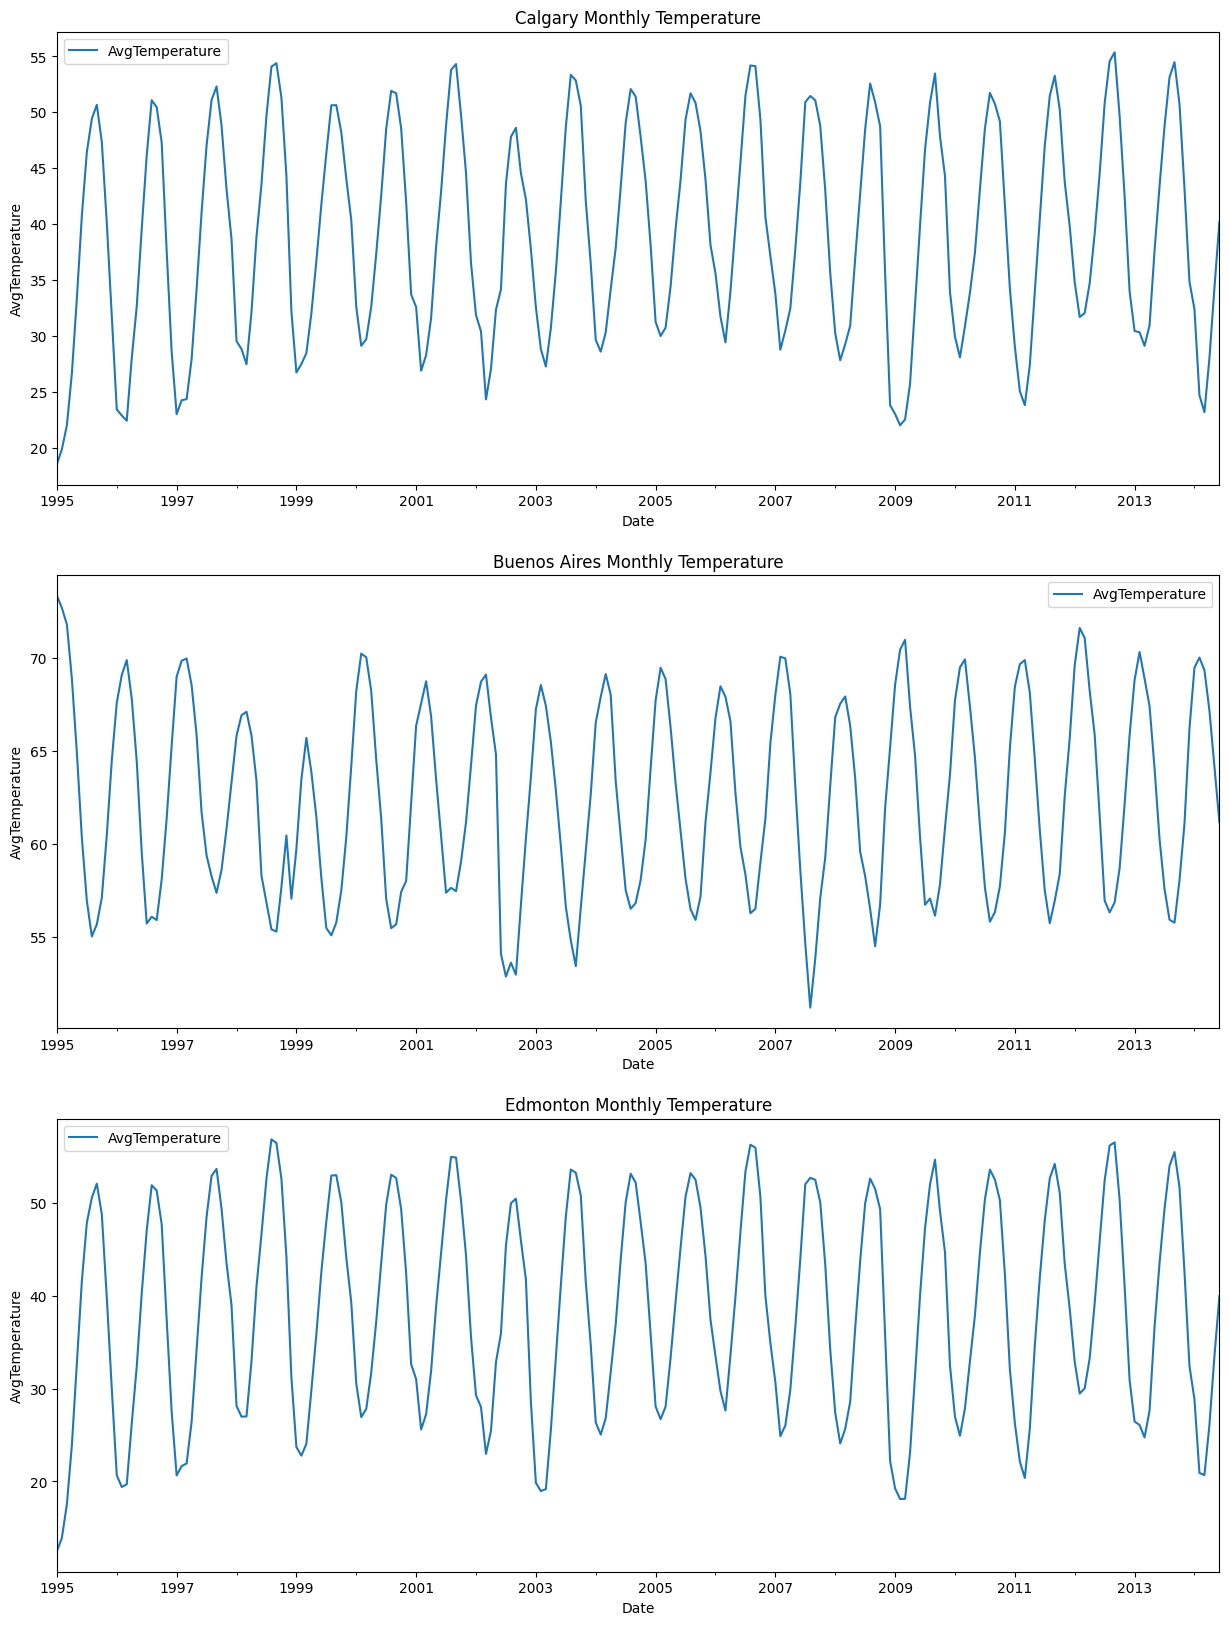

In [ ]:
# Plot monthly smoothed temperature data for cities in different subplots

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_monthly.plot(ax=ax[0], y='AvgTemperature', title=f"{city_1} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_2_monthly.plot(ax=ax[1], y='AvgTemperature', title=f"{city_2} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")
city_3_monthly.plot(ax=ax[2], y='AvgTemperature', title=f"{city_3} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

**Enter answer here:** Calgary and Edmonton have similar seasonal patterns of warm summers and cold winters while Buenos Aires is the opposite since it is in the Southern Hemisphere. The similar temparature patterns of Calgary and Edmonton suggests that they would both be close to each other which is true because they are both in Alberta.

## (c)

Text(0, 0.5, 'Correlation')

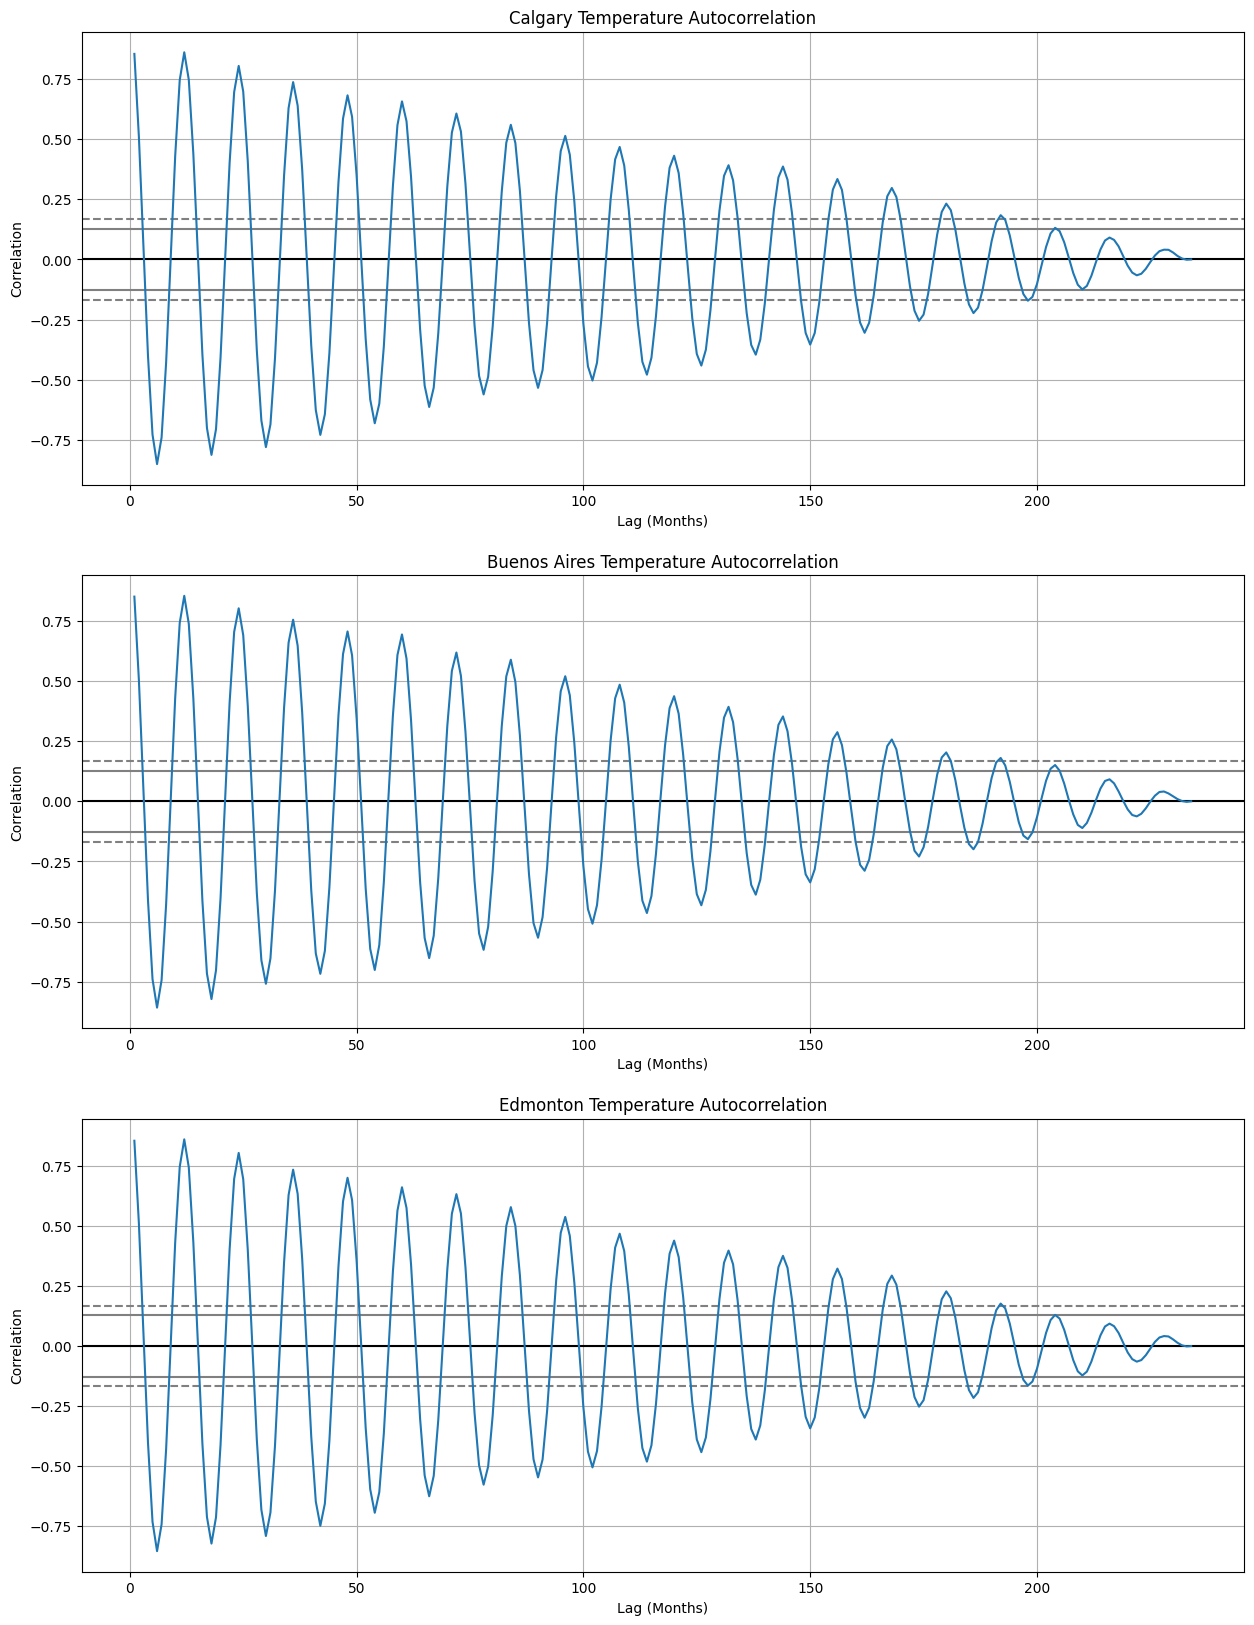

In [ ]:
# Plot auto-correlation of the monthly smoothed temperature of cities in different subplots
# Hint: use pd.plotting.autocorrelation_plot()

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))

pd.plotting.autocorrelation_plot(city_1_monthly['AvgTemperature'], ax=ax[0])
ax[0].set_title(f"{city_1} Temperature Autocorrelation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_2_monthly['AvgTemperature'], ax=ax[1])
ax[1].set_title(f"{city_2} Temperature Autocorrelation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_3_monthly['AvgTemperature'], ax=ax[2])
ax[2].set_title(f"{city_3} Temperature Autocorrelation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")


**Enter answer here:** The autocorrelation plot does confirm the the seasonal patterns in Q4b since they show a strong positive correlation at the yearly lags, which is every 12 months. As the lag increases, the autocorrelation decreases showing that as time goes on, past temparatures affect future temparatures less.

## (d)

Text(0, 0.5, 'Correlation')

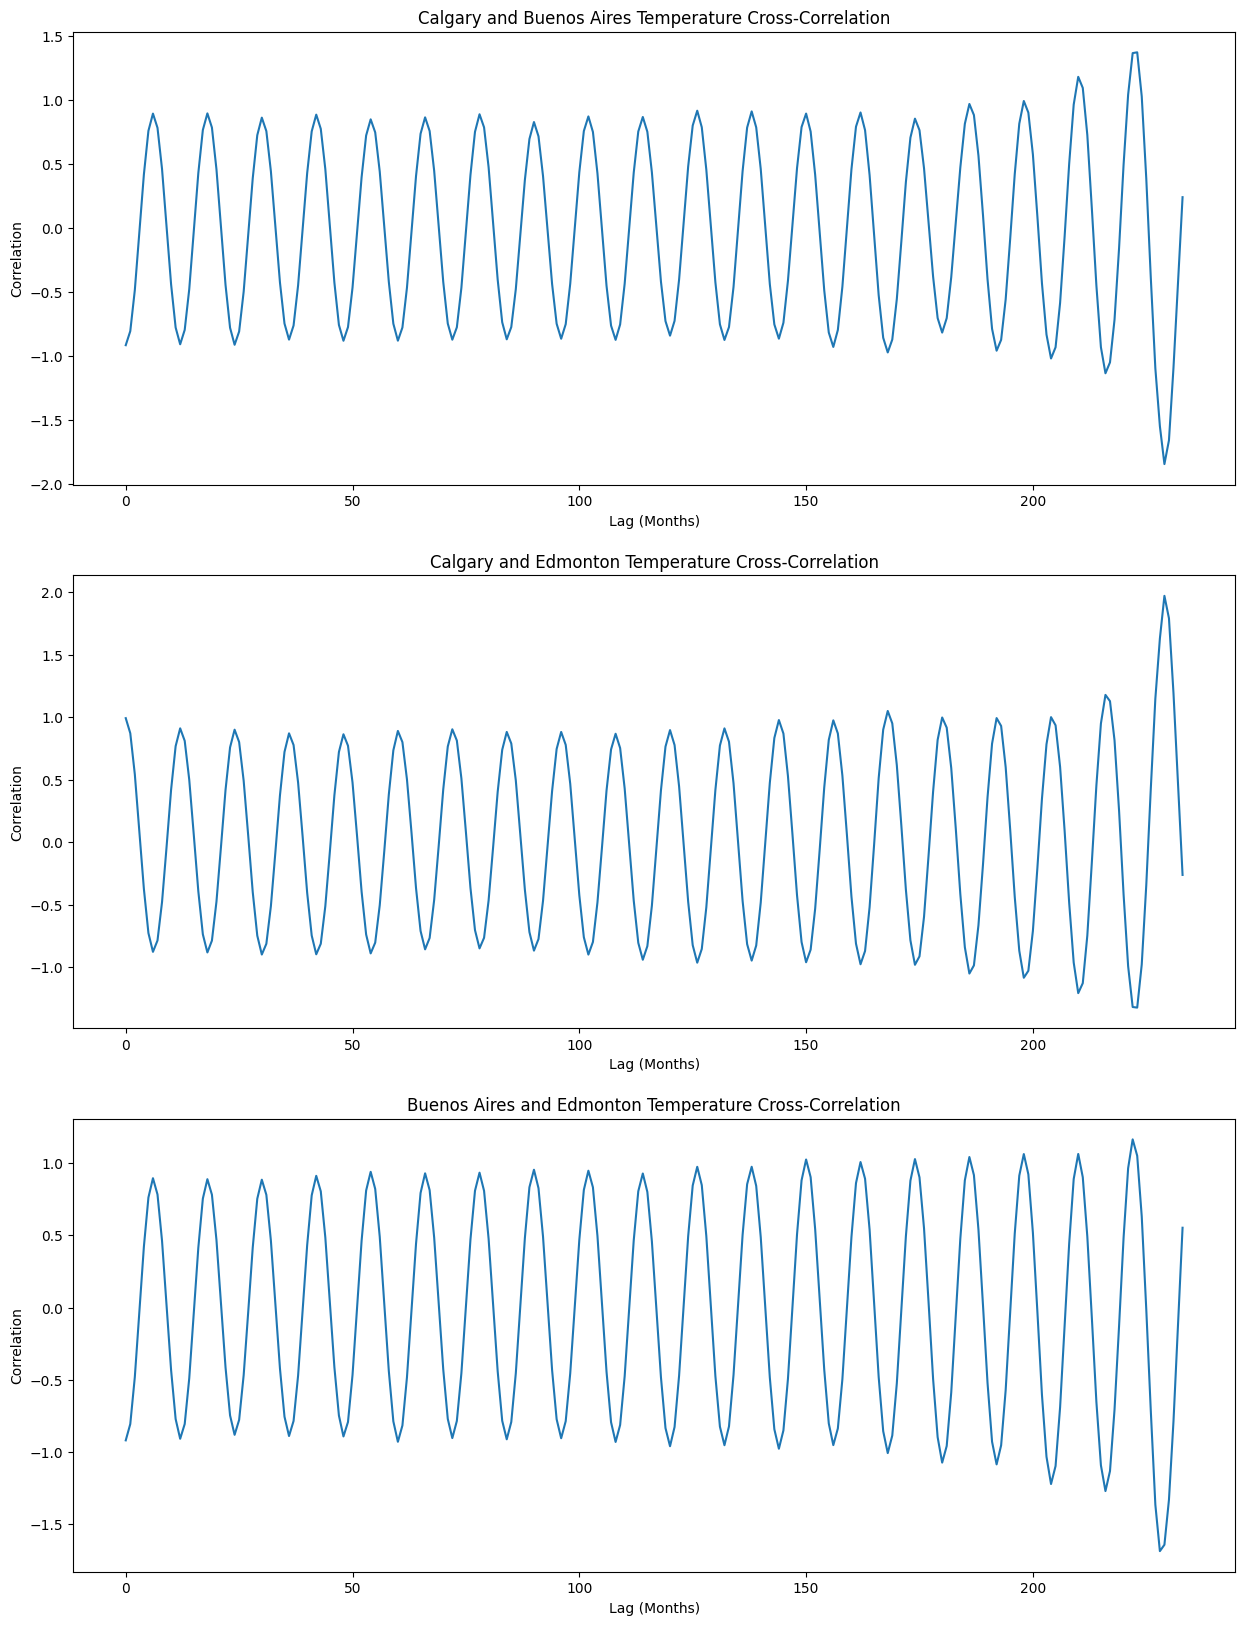

In [ ]:
# Plot cross-correlation between city pairs (Calgary and Buenos Aires, Calgary and Edmonton, Buenos Aires and Edmonton)
# Hint: use ccf() function from statsmodels.tsa.stattools

## YOUR CODE STARTS HERE
fig, ax = plt.subplots(3, 1, figsize=(15,20))

ccf_12 = ccf(city_1_monthly['AvgTemperature'], city_2_monthly['AvgTemperature'])
ccf_13 = ccf(city_1_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])
ccf_23 = ccf(city_2_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])

ax[0].plot(ccf_12)
ax[0].set_title(f"{city_1} and {city_2} Temperature Cross-Correlation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

ax[1].plot(ccf_13)
ax[1].set_title(f"{city_1} and {city_3} Temperature Cross-Correlation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

ax[2].plot(ccf_23)
ax[2].set_title(f"{city_2} and {city_3} Temperature Cross-Correlation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")

**Enter answer here:** When it is summer in Edmonton, it is summer in Calgary and winter in Buenos Aires.
